In [59]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [60]:
# Question
#In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:

#General trend of data jobs in demand. We're going to look at it by month.

In [61]:
# create a copy of the dataframe and only include that roles in USA

df_US = df[df['job_country'] == 'United States' ].copy()

In [87]:
# extract the month name from 'job_posted_date'
df_US['job_posted_month'] = df_US['job_posted_date'].dt.month

In [88]:
# Next let's pivot by month and job_title_short and get the count.
df_US_pivot = df_US.pivot_table(index='job_posted_month',
                                        columns='job_title_short',
                                        aggfunc='size')

In [89]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
1,527,36,8494,2655,6915,60,1544,773,1552,114
2,447,24,6124,3060,4956,56,1258,878,1127,90
3,438,19,6218,3183,4779,59,1114,829,1150,115
4,565,40,6049,2801,4867,51,1025,781,991,112
5,279,20,4993,2976,4377,49,839,746,914,90
6,446,32,5683,2893,4645,48,1009,812,1033,93
7,581,39,5201,2570,4876,65,883,747,1095,153
8,903,39,6634,3269,6318,68,1186,903,1515,194
9,897,50,4639,3224,4568,113,805,775,1014,228


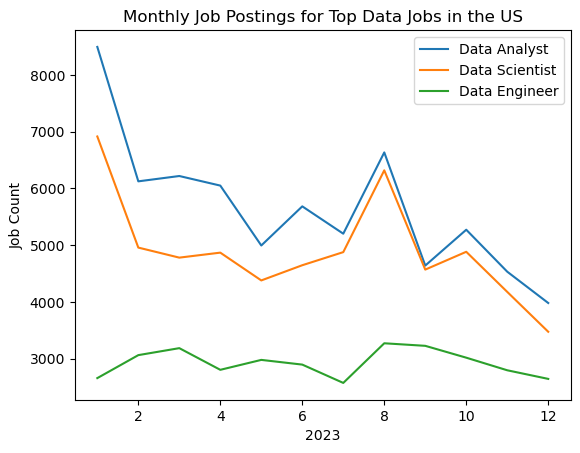

In [90]:
top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [66]:
df['job_country'].value_counts().head(10)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Name: count, dtype: int64

In [67]:
df_India= df[df['job_country'] == 'India'].copy()

In [68]:
df_India['job_posted_month'] = df_India['job_posted_date'].dt.to_period('M')


In [72]:
df_India['job_posted_month']


16        2023-06
19        2023-04
29        2023-03
38        2023-07
42        2023-11
           ...   
785712    2023-03
785715    2023-03
785716    2023-03
785718    2023-03
785740    2023-03
Name: job_posted_month, Length: 51088, dtype: period[M]

In [69]:
top_3_India = df['job_title_short'].value_counts().head(3)

top_3_India = top_3_India.index.tolist()



In [70]:
df_India_pivot = df_India.pivot_table(index= 'job_posted_month', 
                                        columns='job_title_short', 
                                        aggfunc='size')

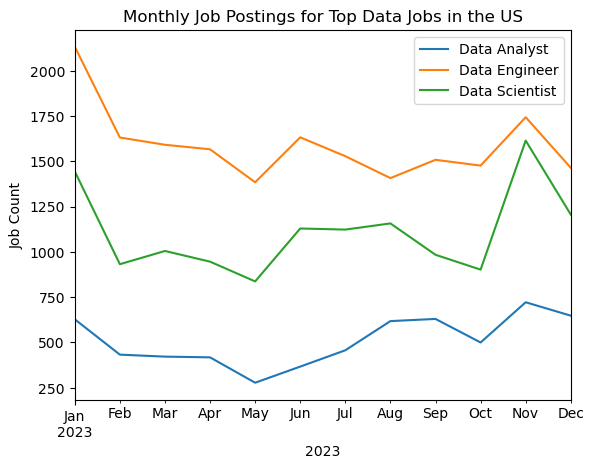

In [71]:
df_India_pivot[top_3_India].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

In [75]:
df_Nepal = df[df['job_country']== 'Nepal'].copy()

In [81]:
df_Nepal

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1746,Data Engineer,Data QA Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-08-09 14:04:23,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None,2023-08
2925,Software Engineer,SQL Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-03-24 14:26:30,True,False,Nepal,None,NaN,NaN,Impetus Incorporation,['sql'],{'programming': ['sql']},2023-03
21167,Data Analyst,"U-Report Data Analyst Consultant, UNICEF Regio...",Nepal,via UNJoblink Careers,Contractor,False,Nepal,2023-07-17 14:09:19,False,False,Nepal,None,NaN,NaN,United Nations Children's Fund (UNICEF),"['r', 'python', 'excel', 'tableau', 'flow']","{'analyst_tools': ['excel', 'tableau'], 'other...",2023-07
24730,Data Analyst,Data Analytics Manager,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-09-01 14:01:47,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None,2023-09
26074,Data Analyst,Data Reporting Analyst – Power BI,Anywhere,via LinkedIn Nepal,Full-time,True,Nepal,2023-04-05 13:29:48,False,False,Nepal,None,NaN,NaN,Linkbridge Technologies Pvt. Ltd.,"['power bi', 'dax']","{'analyst_tools': ['power bi', 'dax']}",2023-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775260,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-05-29 01:15:23,False,False,Nepal,None,NaN,NaN,Codavatar Tech Pvt. Ltd.,"['python', 'c++', 'java', 'r', 'sql', 'hadoop'...","{'libraries': ['hadoop', 'gdpr'], 'programming...",2023-05
776749,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-23 05:57:15,False,False,Nepal,None,NaN,NaN,Reputed IT Company,"['sql', 't-sql', 'c#', 'python', 'vba', 'sql s...","{'analyst_tools': ['ssrs'], 'databases': ['sql...",2023-01
779134,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-22 06:13:07,False,False,Nepal,None,NaN,NaN,Reputed Company,"['sql', 't-sql', 'c#', 'python', 'vba', 'sql s...","{'analyst_tools': ['ssrs'], 'databases': ['sql...",2023-01
779603,Software Engineer,Sr Software Engineer (.Net),"Kathmandu, Nepal",via SmartRecruiters Job Search,Full-time,False,Nepal,2023-01-12 05:42:44,False,False,Nepal,None,NaN,NaN,Verisk,"['c#', 'javascript', 'sql', 'postgresql', 'aws...","{'analyst_tools': ['sharepoint'], 'cloud': ['a...",2023-01


In [76]:
df_Nepal['job_posted_month']= df_Nepal['job_posted_date'].dt.to_period('M')

In [78]:
top_3_Nepal = df['job_title_short'].value_counts().head(3)
top_3_Nepal = top_3_Nepal.index.tolist()

In [86]:
top_3_Nepal

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [82]:
df_Nepal_pivot = df_Nepal.pivot_table(index='job_posted_month', 
                                        columns='job_title_short', 
                                        aggfunc='size')



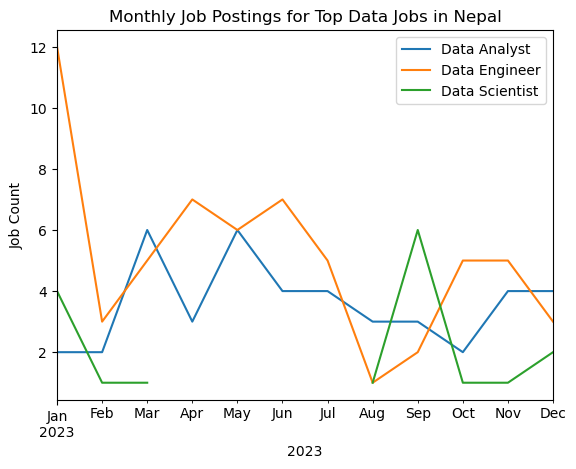

In [85]:
df_Nepal_pivot[top_3_Nepal].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in Nepal')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()  